<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#imports_data)
2. [Data exploration](#data_exploration)
3. [Data preparation](#data_preparation)
4. [Benchmark model](#benchmark_model)<br>
5. [Feature engineering](#feature_engineering)
6. [Train model](#train_model) <br>
    6.1. [Decision tree](#decision_tree) <br>
    6.2. [Random forest](#random_forest) <br>
    6.3. [Gradient booster](#gradient_booster)
7. [Tuning](#tune) <br>
    7.1. [Finding best parameters](#find_best_p)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data <a id='imports_data'></a>
[Back to top](#table_of_contents)

In [5]:
initial_wine_df = pd.read_csv(r'C:\Users\danie\Machine_Learning\datasets\datasets_for_Projects\winequality-red.csv')
initial_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [6]:
initial_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

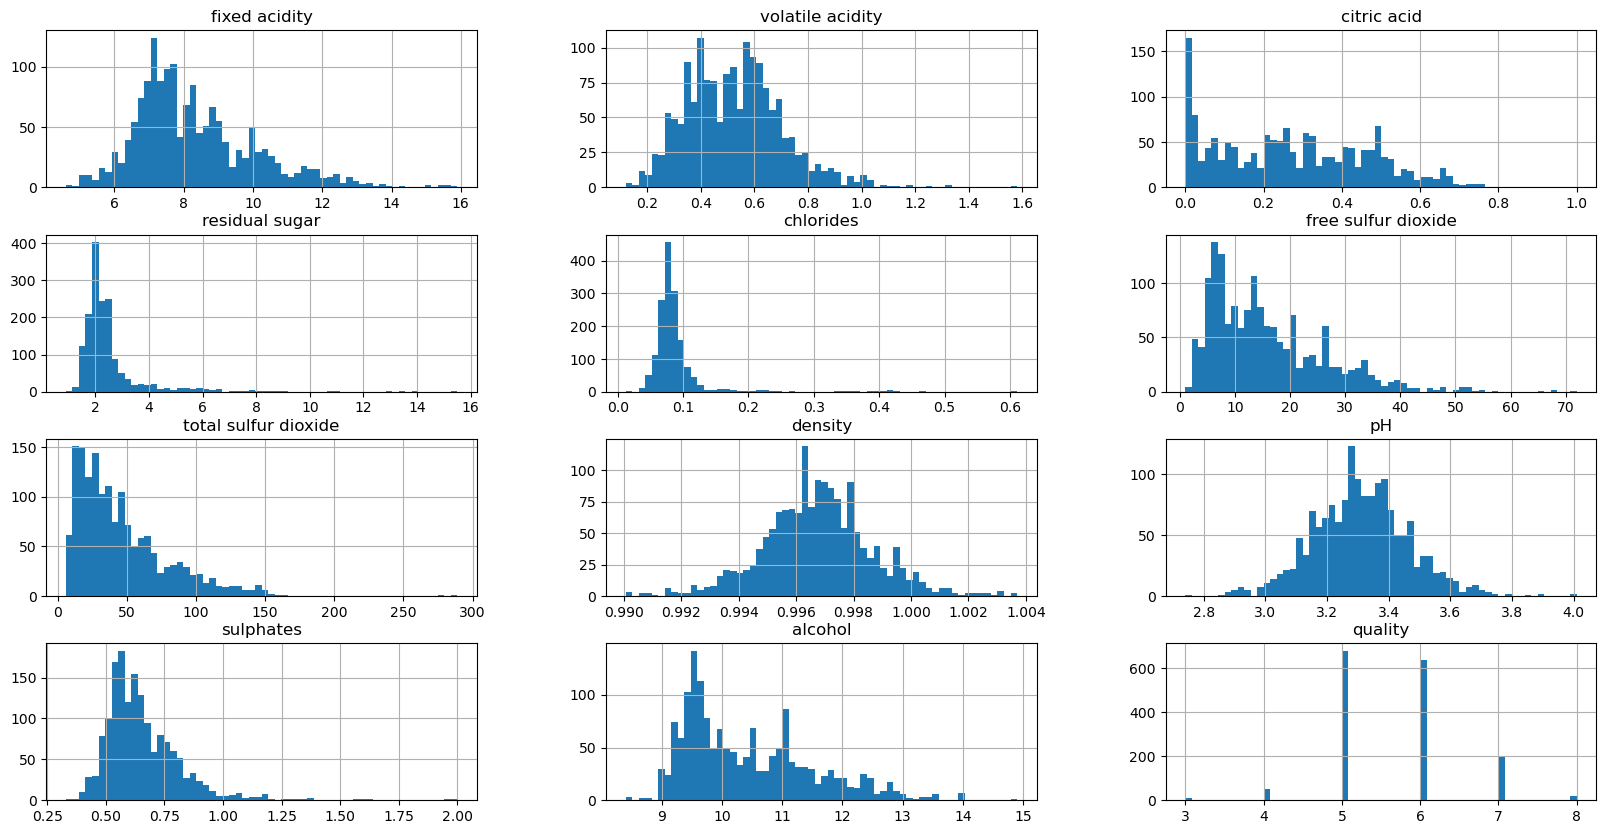

In [7]:
initial_wine_df.hist(bins=(60), figsize=(20,10))

**Everything seems to be okay with the dataset**

# 3. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [8]:
prepared_wine_data = initial_wine_df.copy()

In [9]:
# We will associate the value 0 to bad quality wine and 1 to good quality wine
prepared_wine_data['Quality_class'] = prepared_wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
prepared_wine_data = prepared_wine_data.drop(columns='quality')
prepared_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [10]:
# The features they have different scales, so I will normalize some of the features
features_to_normalize = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']

for feature in features_to_normalize:
    prepared_wine_data[f'{feature}_scaled'] = (prepared_wine_data[feature] - prepared_wine_data[feature].min())/(prepared_wine_data[feature].max() - prepared_wine_data[feature].min())

prepared_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_class,fixed acidity_scaled,residual sugar_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,alcohol_scaled
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.247788,0.068493,0.140845,0.098940,0.153846
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.283186,0.116438,0.338028,0.215548,0.215385
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.283186,0.095890,0.197183,0.169611,0.215385
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0.584071,0.068493,0.225352,0.190813,0.215385
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.247788,0.068493,0.140845,0.098940,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0.141593,0.075342,0.436620,0.134276,0.323077
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,0.115044,0.089041,0.535211,0.159011,0.430769
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0.150442,0.095890,0.394366,0.120141,0.400000
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0.115044,0.075342,0.436620,0.134276,0.276923


In [11]:
# Dropping non-scaled feature columns
prepared_wine_data = prepared_wine_data.drop(columns=features_to_normalize)
prepared_wine_data

,volatile acidity,citric acid,chlorides,density,pH,sulphates,Quality_class,fixed acidity_scaled,residual sugar_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,alcohol_scaled
0,0.700,0.00,0.076,0.99780,3.51,0.56,0,0.247788,0.068493,0.140845,0.098940,0.153846
1,0.880,0.00,0.098,0.99680,3.20,0.68,0,0.283186,0.116438,0.338028,0.215548,0.215385
2,0.760,0.04,0.092,0.99700,3.26,0.65,0,0.283186,0.095890,0.197183,0.169611,0.215385
3,0.280,0.56,0.075,0.99800,3.16,0.58,1,0.584071,0.068493,0.225352,0.190813,0.215385
4,0.700,0.00,0.076,0.99780,3.51,0.56,0,0.247788,0.068493,0.140845,0.098940,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,0.99490,3.45,0.58,0,0.141593,0.075342,0.436620,0.134276,0.323077
1595,0.550,0.10,0.062,0.99512,3.52,0.76,1,0.115044,0.089041,0.535211,0.159011,0.430769
1596,0.510,0.13,0.076,0.99574,3.42,0.75,1,0.150442,0.095890,0.394366,0.120141,0.400000
1597,0.645,0.12,0.075,0.99547,3.57,0.71,0,0.115044,0.075342,0.436620,0.134276,0.276923


# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [12]:
benchmark_data = prepared_wine_data.copy()
benchmark_data.columns

Index(['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH',
       'sulphates', 'Quality_class', 'fixed acidity_scaled',
       'residual sugar_scaled', 'free sulfur dioxide_scaled',
       'total sulfur dioxide_scaled', 'alcohol_scaled'],
      dtype='object')

In [13]:
input_features_bench = ['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', 'fixed acidity_scaled', 'residual sugar_scaled', 
                        'free sulfur dioxide_scaled', 'total sulfur dioxide_scaled', 'alcohol_scaled']
output_feature_bench = ['Quality_class']

**Train-test split**

In [14]:
from sklearn.model_selection import train_test_split

X = benchmark_data[input_features_bench]
y = benchmark_data[output_feature_bench]

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X, y, test_size=0.2, random_state=42)

**Training the model, in this case the benchmark model selected was a DecisionTree**

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train_bench, y_train_bench)

DecisionTreeClassifier(max_depth=10)

**Evaluating the model precision**

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_bench = tree.predict(X_test_bench)

print(f'Accuracy: {accuracy_score(y_test_bench, y_pred_bench)}')

Accuracy: 0.728125


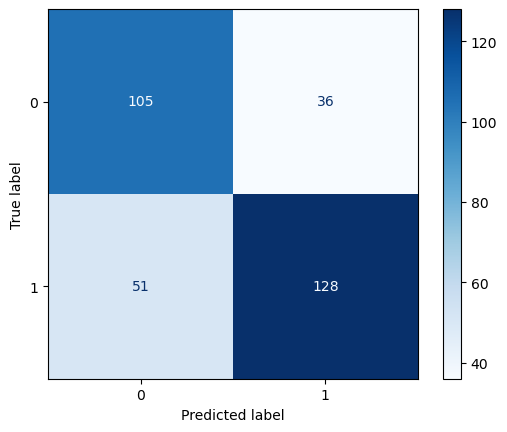

In [17]:
cm = confusion_matrix(y_test_bench, y_pred_bench)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

**Our model predictions it's really good, but can be perfected**

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [18]:
features_filtered_data = benchmark_data.copy()

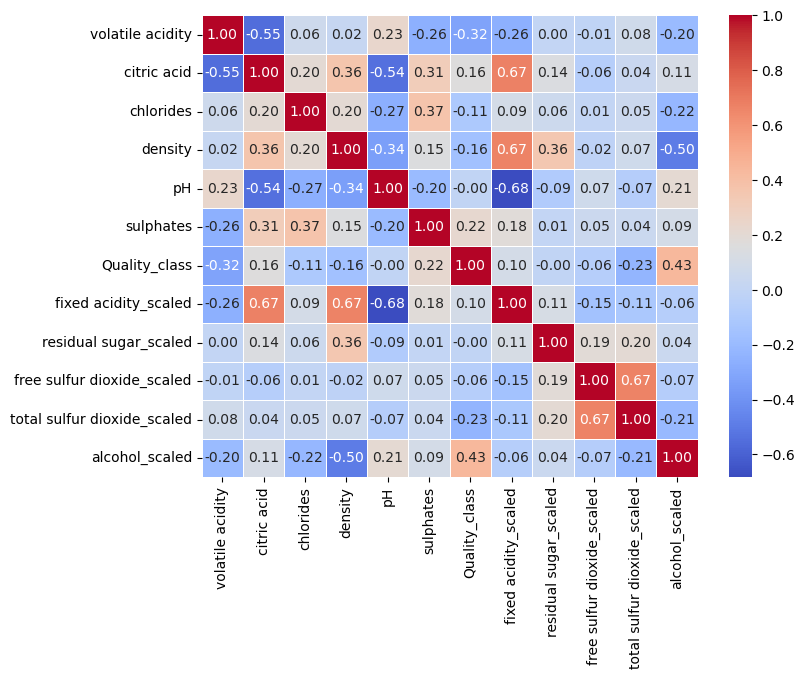

In [19]:
corr_matrix = features_filtered_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

**Setting a threshold of 0.2, for wine_quality(output) and input_features correlation**

In [20]:
features_filtered_data.columns

Index(['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH',
       'sulphates', 'Quality_class', 'fixed acidity_scaled',
       'residual sugar_scaled', 'free sulfur dioxide_scaled',
       'total sulfur dioxide_scaled', 'alcohol_scaled'],
      dtype='object')

In [21]:
features_filtered_data = features_filtered_data[['volatile acidity',  'sulphates', 'total sulfur dioxide_scaled', 'alcohol_scaled', 'Quality_class']]

# 7. Train model <a id='train_model'></a>
[Back to top](#table_of_contents)

In [22]:
comparision_table = pd.DataFrame()
comparision_table['Metrics'] = ['Accuracy', 'Precision', 'Recall', 'F1-score']

input_features = ['volatile acidity',  'sulphates', 'total sulfur dioxide_scaled', 'alcohol_scaled']
output_feature = 'Quality_class'

X_train, X_test, y_train, y_test = train_test_split(features_filtered_data[input_features], features_filtered_data[output_feature], test_size=0.2, random_state=42)

## 7.1. Decision Tree <a id='decision_tree'></a>
[Back to top](#table_of_contents)

In [23]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [24]:
y_pred = tree.predict(X_test)

comparision_table['D.Tree'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.734375


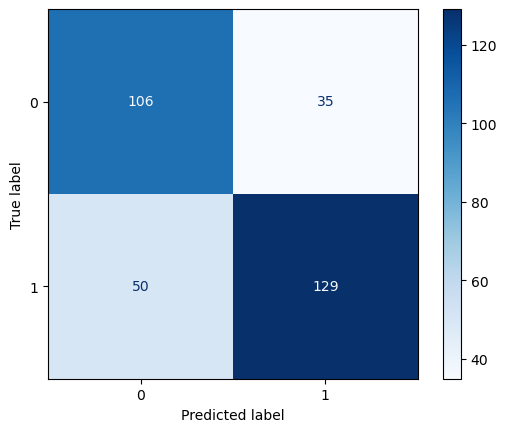

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## 7.2. Random Forest <a id='random_forest'></a>
[Back to top](#table_of_contents)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=10)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [27]:
y_pred = forest.predict(X_test)

comparision_table['R.Forest'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.784375


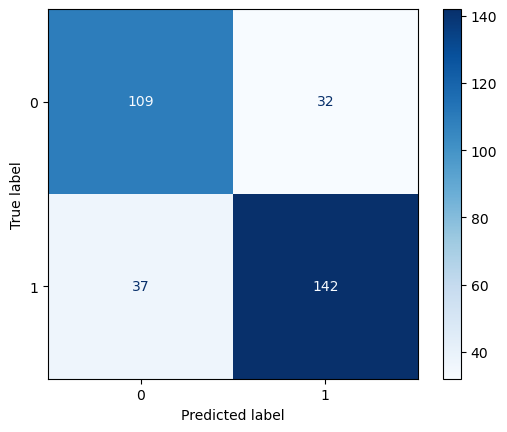

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## 7.3. Gradient booster <a id='gradient_booster'></a>
[Back to top](#table_of_contents)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()

gradient.fit(X_train, y_train)

GradientBoostingClassifier()

In [30]:
y_pred = gradient.predict(X_test)

comparision_table['G.Boosting'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.734375


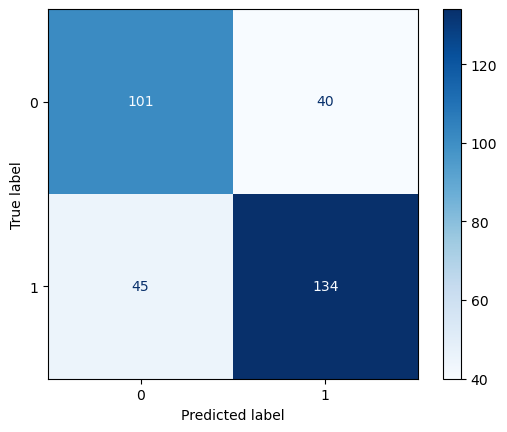

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [32]:
comparision_table

,Metrics,D.Tree,R.Forest,G.Boosting
0,Accuracy,0.734375,0.784375,0.734375
1,Precision,0.786585,0.816092,0.770115
2,Recall,0.720670,0.793296,0.748603
3,F1-score,0.752187,0.804533,0.759207


# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)